# Relationships between variables

So far we have only looked at one variable at a time.
In this chapter we look at relationships between variables.
Two variables are related if knowing one gives you information about the other.
For example, height and weight are related; people who are taller tend to be heavier.
Of course, it is not a perfect relationship: there are short heavy people and tall light ones.
But if you are trying to guess someone's weight, you will be more accurate if you know their height than if you don't.

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

<IPython.core.display.Javascript object>

In [3]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate

<IPython.core.display.Javascript object>

## Scatter Plots




Among students at a given college or university, do you think math and verbal skills are correlated, anti-correlated, or uncorrelated? In other words, if someone is above average at one of these skills, would you expect them to be above average on the other, or below average, or do you think they are unrelated?

To answer this question, I will use data from the National Longitudinal Survey of Youth 1997 (NLSY97), which "follows the lives of a sample of 8,984 American youth born between 1980-84". The public data set includes the participants' scores on several standardized tests, including the tests most often used in college admissions, the SAT and ACT.

I used the NLS Investigator to create excerpt that contains the variables I'll use for this analysis. With their permission, I can redistribute this except. The following cell downloads the data.


In [105]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/stand_test_corr.csv.gz")

<IPython.core.display.Javascript object>

In [106]:
nlsy = pd.read_csv("stand_test_corr.csv.gz")
nlsy.head()

,R0000100,R0536300,R0536401,R0536402,R1235800,R1482600,R5473600,R5473700,R7237300,R7237400,...,R9794001,R9829600,S1552600,S1552700,Z9033700,Z9033800,Z9033900,Z9034000,Z9034100,Z9034200
0,1,2,9,1981,1,4,-4,-4,-4,-4,...,1998,45070,-4,-4,4,3,3,2,-4,-4
1,2,1,7,1982,1,2,-4,-4,-4,-4,...,1998,58483,-4,-4,4,5,4,5,-4,-4
2,3,2,9,1983,1,2,-4,-4,-4,-4,...,-4,27978,-4,-4,2,4,2,4,-4,-4
3,4,2,2,1981,1,2,-4,-4,-4,-4,...,-4,37012,-4,-4,-4,-4,-4,-4,-4,-4
4,5,1,10,1982,1,2,-4,-4,-4,-4,...,-4,-4,-4,-4,2,3,6,3,-4,-4


<IPython.core.display.Javascript object>

In [107]:
column_dict = {
    "R9793800": "sat_verbal",
    "R9793900": "sat_math",
}

nlsy.rename(columns=column_dict, inplace=True)

<IPython.core.display.Javascript object>

In [108]:
columns = ["sat_verbal", "sat_math"]

for column in columns:
    invalid = nlsy[column] < 200
    nlsy.loc[invalid, column] = np.nan

<IPython.core.display.Javascript object>

In [124]:
nlsy_clean = nlsy.dropna(subset=columns)
nlsy_clean.shape

(1398, 29)

<IPython.core.display.Javascript object>

In [127]:
sat_verbal = nlsy_clean["sat_verbal"]
sat_verbal.mean(), sat_verbal.std()

(501.80972818311875, 108.36562024213643)

<IPython.core.display.Javascript object>

In [128]:
sat_math = nlsy_clean["sat_math"]
sat_math.mean(), sat_math.std()

(503.0829756795422, 109.8329973731453)

<IPython.core.display.Javascript object>

The simplest way to check for a relationship between two variables is a **scatter plot**, but making a good scatter plot is not always easy.
As an example, I'll plot weight versus height for the respondents in the BRFSS (see Section [\[lognormal\]](#lognormal){reference-type="ref" reference="lognormal"}).

Here's the code that reads the data file and extracts height and weight:

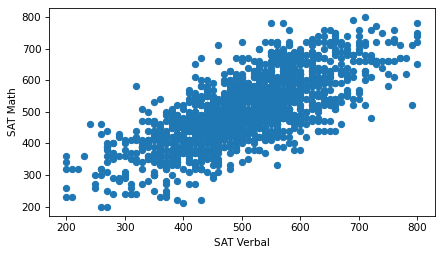

<IPython.core.display.Javascript object>

In [129]:
plt.plot(sat_verbal, sat_math, "o")

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

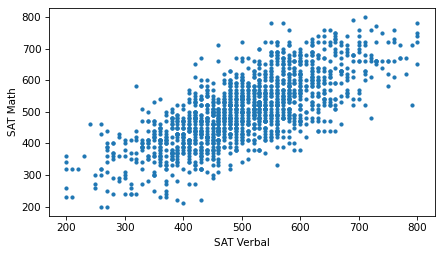

<IPython.core.display.Javascript object>

In [130]:
plt.plot(sat_verbal, sat_math, ".")

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

The scatter plot shows the shape of the relationship -- taller people tend to be heavier.

But this is not the best representation of the data, because the data are packed into columns.
The problem is that the heights are rounded to the nearest inch, converted to centimeters, and then rounded again.
Some information is lost in translation.

We can't get that information back, but we can minimize the effect on the scatter plot by **jittering** the data, which means adding random noise to reverse the effect of rounding off.


In [131]:
def jitter(seq, std=0.5):
    """Jitters the values by adding random Gaussian noise.

    seq: sequence of numbers
    std: standard deviation of the added noise

    returns: new Numpy array
    """
    n = len(seq)
    return np.random.normal(0, std, n) + seq

<IPython.core.display.Javascript object>

The values can be any sequence; the result is a NumPy array.

In [132]:
sat_verbal_jittered = jitter(sat_verbal, 3)
sat_math_jittered = jitter(sat_math, 3)

<IPython.core.display.Javascript object>

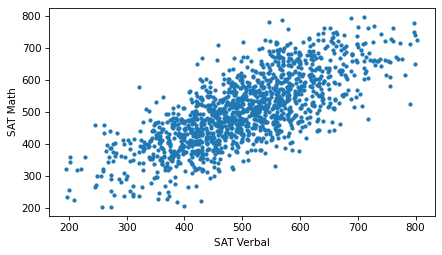

<IPython.core.display.Javascript object>

In [133]:
plt.plot(sat_verbal_jittered, sat_math_jittered, ".")

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

Jittering reduces the visual effect of rounding and makes the shape of the relationship clearer.
But in general you should only jitter data for purposes of visualization and avoid using jittered data for analysis.

Even with jittering, this is not the best way to represent the data.
There are many overlapping points, which hides data in the dense parts of the figure and gives disproportionate emphasis to outliers.
This effect is called **overplotting**.

We can solve this problem with the `alpha` parameter, which makes the points partly transparent:

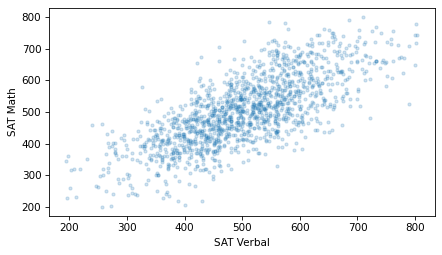

<IPython.core.display.Javascript object>

In [123]:
plt.plot(sat_verbal_jittered, sat_math_jittered, ".", alpha=0.2)

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

With transparency, overlapping data points look darker, so darkness is proportional to density.


## Characterizing Relationships

Scatter plots provide a general impression of the relationship between variables, but there are other visualizations that provide more insight into the nature of the relationship.
One option is to bin one variable and plot percentiles of the other.

NumPy and Pandas provide functions for binning data:

In [144]:
df_groupby = nlsy_clean.groupby("sat_verbal")
df_groupby

<IPython.core.display.Javascript object>

In [146]:
series_groupby = df_groupby["sat_math"]
series_groupby

<IPython.core.display.Javascript object>

In [148]:
low = series_groupby.quantile(0.1)
median = series_groupby.quantile(0.5)
high = series_groupby.quantile(0.9)

<IPython.core.display.Javascript object>

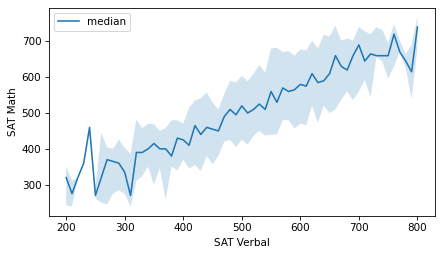

<IPython.core.display.Javascript object>

In [154]:
xs = low.index
plt.fill_between(xs, low, high, alpha=0.2)
plt.plot(xs, median, color="C0", label="median")

decorate(xlabel="SAT Verbal", ylabel="SAT Math")

## Correlation



In [78]:
def standardize(xs):
    """Standardizes a sequence of numbers.

    xs: sequence of numbers

    returns: NumPy array
    """
    return (xs - np.mean(xs)) / np.std(xs)

<IPython.core.display.Javascript object>

In [79]:
verbal_standardized = standardize(sat_verbal)
np.mean(verbal_standardized), np.std(verbal_standardized)

(-9.148618915366097e-17, 1.0)

<IPython.core.display.Javascript object>

In [80]:
math_standardized = standardize(sat_math)
np.mean(math_standardized), np.std(math_standardized)

(1.4231184979458373e-16, 1.0)

<IPython.core.display.Javascript object>

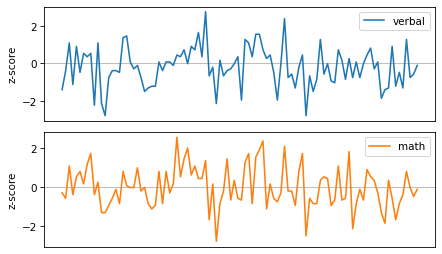

<IPython.core.display.Javascript object>

In [104]:
plt.subplot(2, 1, 1)
plt.axhline(0, color="gray", lw=1, alpha=0.5)
plt.plot(verbal_standardized.values[:100], label="verbal")
decorate(ylabel="z-score", xticks=[])

plt.subplot(2, 1, 2)
plt.axhline(0, color="gray", lw=1, alpha=0.5)
plt.plot(math_standardized.values[:100], label="math", color="C1")
decorate(ylabel="z-score", xticks=[])

In [89]:
np.mean(verbal_standardized * math_standardized)

0.7347390947044948

<IPython.core.display.Javascript object>

In [90]:
np.corrcoef(verbal_standardized, math_standardized)

array([[1.        , 0.73473909],
       [0.73473909, 1.        ]])

<IPython.core.display.Javascript object>

A **correlation** is a statistic intended to quantify the strength of the relationship between two variables.

A challenge in measuring correlation is that the variables we want to compare are often not expressed in the same units.
And even if they are in the same units, they come from different distributions.

There are two common solutions to these problems:

1.  Transform each value to a **standard score**, which is the number of standard deviations from the mean.
This transform leads to the "Pearson product-moment correlation coefficient."

2.  Transform each value to its **rank**, which is its index in the sorted list of values.
This transform leads to the "Spearman rank correlation coefficient."

If $X$ is a series of $n$ values, $x_i$, we can convert to standard scores by subtracting the mean and dividing by the standard deviation: $z_i = (x_i - \mu) / \sigma$.

The numerator is a deviation: the distance from the mean.
Dividing by $\sigma$ **standardizes** the deviation, so the values of $Z$ are dimensionless (no units) and their distribution has mean 0 and variance 1.

If $X$ is normally distributed, so is $Z$.
But if $X$ is skewed or has outliers, so does $Z$; in those cases, it is more robust to use percentile ranks.
If we compute a new variable, $R$, so that $r_i$ is the rank of $x_i$, the distribution of $R$ is uniform from 1 to $n$, regardless of the distribution of $X$.

## Pearson's correlation

Covariance is useful in some computations, but it is seldom reported as a summary statistic because it is hard to interpret.
Among other problems, its units are the product of the units of $X$ and $Y$.
For example, the covariance of weight and height in the BRFSS dataset is 113 kilogram-centimeters, whatever that means.

One solution to this problem is to divide the deviations by the standard deviation, which yields standard scores, and compute the product of standard scores:

$$p_i = \frac{(x_i - \bar{x})}{S_X} \frac{(y_i - \bar{y})}{S_Y}$$ 

Where $S_X$ and $S_Y$ are the standard deviations of $X$ and $Y$.
The mean of these products is $$\rho = \frac{1}{n} \sum p_i$$ 

Or we can rewrite $\rho$ by factoring out $S_X$ and $S_Y$:

$$\rho = \frac{Cov(X,Y)}{S_X S_Y}$$

This value is called **Pearson's correlation** after Karl Pearson, an influential early statistician.
It is easy to compute and easy to interpret.
Because standard scores are dimensionless, so is $\rho$.

Here's a function that computes correlations.

In [19]:
def corr(xs, ys):
    sx = np.std(xs)
    sy = np.std(ys)
    corr = cov(xs, ys) / sx / sy
    return corr

<IPython.core.display.Javascript object>

Pearson's correlation is always between -1 and +1 (including both).
If $\rho$ is positive, we say that the correlation is positive, which means that when one variable is high, the other tends to be high.
If $\rho$ is negative, the correlation is negative, so when one variable is high, the other is low.

The magnitude of $\rho$ indicates the strength of the correlation.
If $\rho$ is 1 or -1, the variables are perfectly correlated, which means that if you know one, you can make a perfect prediction about the other.

In [20]:
corr(heights, weights)

0.4909057148335197

<IPython.core.display.Javascript object>

Most correlation in the real world is not perfect, but it is still useful.
The correlation of height and weight is 0.51, which is a strong correlation compared to similar human-related variables.

## Nonlinear Relationships

If Pearson's correlation is near 0, it is tempting to conclude that there is no relationship between the variables, but that conclusion is not valid.
Pearson's correlation only measures *linear* relationships.
If there's a nonlinear relationship, $\rho$ understates its strength.

The following figure is from <http://wikipedia.org/wiki/Correlation_and_dependence>.
It shows scatter plots and correlation coefficients for several carefully constructed datasets.

In [21]:
# TODO insert figure

<IPython.core.display.Javascript object>

The top row shows linear relationships with a range of correlations; you can use this row to get a sense of what different values of $\rho$ look like.
The second row shows perfect correlations with a range of slopes, which demonstrates that correlation is unrelated to slope (we'll talk about estimating slope soon).
The third row shows variables that are clearly related, but because the relationship is nonlinear, the correlation coefficient is 0.

The moral of this story is that you should always look at a scatter plot of your data before blindly computing a correlation coefficient.

## Spearman's rank correlation

Pearson's correlation works well if the relationship between variables is linear and if the variables are roughly normal.
But it is not robust in the presence of outliers.
Spearman's rank correlation is an alternative that mitigates the effect of outliers and skewed distributions.
To compute Spearman's correlation, we have to compute the **rank** of each value, which is its index in the sorted sample.
For example, in the sample `[5, 1, 2, 7]` the rank of the value 5 is 3, because it appears third in the sorted list.

To compute ranks...





In [22]:
import pandas as pd

t = [5, 1, 2, 7]
pd.Series(t).rank()

0    3.0
1    1.0
2    2.0
3    4.0
dtype: float64

<IPython.core.display.Javascript object>

Then we compute Pearson's correlation for the ranks.

In [23]:
import pandas as pd


def spearman_corr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return corr(xranks, yranks)

<IPython.core.display.Javascript object>

In [24]:
spearman_corr(heights, weights)

0.5167067762755635

<IPython.core.display.Javascript object>

The Spearman rank correlation for the BRFSS data is 0.53, a little higher than the Pearson correlation, 0.51. There are several possible reasons for the difference, including:

-   If the relationship is nonlinear, Pearson's correlation tends to underestimate the strength of the relationship, and

-   Pearson's correlation can be affected (in either direction) if one of the distributions is skewed or contains outliers.
Spearman's rank correlation is more robust.

In the BRFSS example, we know that the distribution of weights is roughly lognormal; under a log transform it approximates a normal distribution, so it has no skew.
So another way to eliminate the effect of skewness is to compute Pearson's correlation with log-weight and height:

In [25]:
corr(heights, np.log10(weights))

0.5070358113902116

<IPython.core.display.Javascript object>

The result is very close to the rank correlation.
So that suggests that skewness in the distribution of weight explains most of the difference between Pearson's and Spearman's correlation.

## Correlation and causation

If variables A and B are correlated, there are three possible explanations: A causes B, or B causes A, or some other set of factors causes both A and B. These explanations are called "causal relationships".

Correlation alone does not distinguish between these explanations, so it does not tell you which ones are true.
This rule is often summarized with the phrase "Correlation does not imply causation," which is so pithy it has its own Wikipedia page: <http://wikipedia.org/wiki/Correlation_does_not_imply_causation>.

So what can you do to provide evidence of causation?

1.  Use time.
If A comes before B, then A can cause B but not the other way around (at least according to our common understanding of causation).
The order of events can help us infer the direction of causation, but it does not preclude the possibility that something else causes both A and B.

2.  Use randomness.
If you divide a large sample into two groups at random and compute the means of almost any variable, you expect the difference to be small.
If the groups are nearly identical in all variables but one, you can eliminate spurious relationships.

This works even if you don't know what the relevant variables are, but it works even better if you do, because you can check that the groups are identical.

These ideas are the motivation for the **randomized controlled trial**, in which subjects are assigned randomly to two (or more) groups: a **treatment group** that receives some kind of intervention, like a new medicine, and a **control group** that receives no intervention, or another treatment whose effects are known.

A randomized controlled trial is the most reliable way to demonstrate a causal relationship, and the foundation of science-based medicine (see <http://wikipedia.org/wiki/Randomized_controlled_trial>).

Unfortunately, controlled trials are only possible in the laboratory sciences, medicine, and a few other disciplines.
In the social sciences, controlled experiments are rare, usually because they are impossible or unethical.

An alternative is to look for a **natural experiment**, where different "treatments" are applied to groups that are otherwise similar.
One danger of natural experiments is that the groups might differ in ways that are not apparent.
You can read more about this topic at <http://wikipedia.org/wiki/Natural_experiment>.

In some cases it is possible to infer causal relationships using **regression analysis**, which is the topic of Chapter [\[regression\]](#regression){reference-type="ref" reference="regression"}.

## Glossary

-   **scatter plot**: A visualization of the relationship between two variables, showing one point for each row of data.

-   **jitter**: Random noise added to data for purposes of visualization.

-   **saturation**: Loss of information when multiple points are plotted on top of each other.

-   **correlation**: A statistic that measures the strength of the relationship between two variables.

-   **standardize**: To transform a set of values so that their mean is 0 and their variance is 1.

-   **standard score**: A value that has been standardized so that it is expressed in standard deviations from the mean.

-   **covariance**: A measure of the tendency of two variables to vary together.

-   **rank**: The index where an element appears in a sorted list.

-   **randomized controlled trial**: An experimental design in which subjects are divided into groups at random, and different groups are given different treatments.

-   **treatment group**: A group in a controlled trial that receives some kind of intervention.

-   **control group**: A group in a controlled trial that receives no treatment, or a treatment whose effect is known.

-   **natural experiment**: An experimental design that takes advantage of a natural division of subjects into groups in ways that are at least approximately random.

## Exercises

**Exercise:**  So far we have been working with a subset of only 5000 respondents.
When we include the entire dataset, making an effective scatter plot can be tricky.
As an exercise, experiment with `scatter` and `hex_bin` to make a plot that represents the entire dataset well.

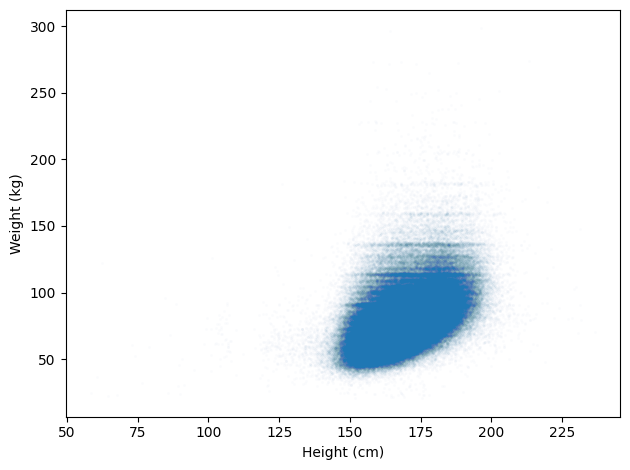

<IPython.core.display.Javascript object>

In [26]:
# Solution

heights_jittered = jitter(df['htm3'], 2.8)
weights_jittered = jitter(df['wtkg2'], 1.0)

plt.scatter(heights_jittered, weights_jittered, alpha=0.01, s=2)
decorate(xlabel="Height (cm)", ylabel="Weight (kg)")

**Exercise:** Yet another option is to divide the dataset into groups and then plot the CDF for each group.
As an exercise, divide the dataset into a smaller number of groups and plot the CDF for each group.

In [27]:
# Solution

cleaned = df.dropna(subset=["htm3", "wtkg2"])

<IPython.core.display.Javascript object>

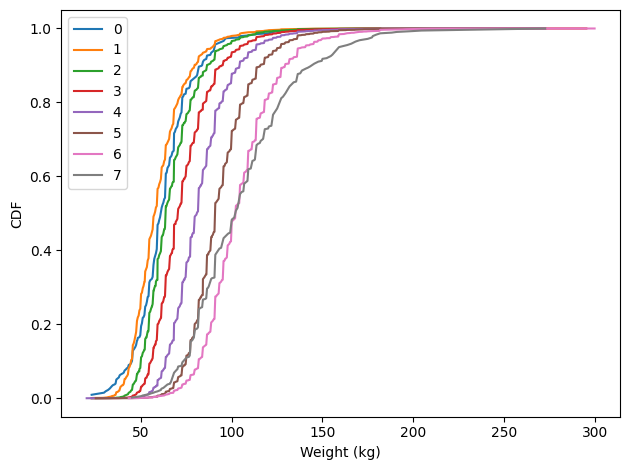

<IPython.core.display.Javascript object>

In [28]:
# Solution

bins = np.arange(140, 210, 10)
indices = np.digitize(cleaned['htm3'], bins)
groups = cleaned.groupby(indices)
cdfs = [Cdf.from_seq(group.wtkg2, name=i) for i, group in groups]

for cdf in cdfs:
    cdf.plot()
decorate(xlabel="Weight (kg)", ylabel="CDF")

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.
Plot percentiles of birth weight versus mother’s age.
Compute Pearson’s and Spearman’s correlations.
How would you characterize the relationship between these variables?

In [29]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

<IPython.core.display.Javascript object>

In [30]:
import nsfg

live, firsts, others = nsfg.make_frames()
live = live.dropna(subset=["agepreg", "totalwgt_lb"])

<IPython.core.display.Javascript object>

In [31]:
# Solution

ages = live.agepreg
weights = live.totalwgt_lb
print("corr", corr(ages, weights))
print("spearman_corr", spearman_corr(ages, weights))

corr 0.0688339703541091
spearman_corr 0.09461004109658228


<IPython.core.display.Javascript object>

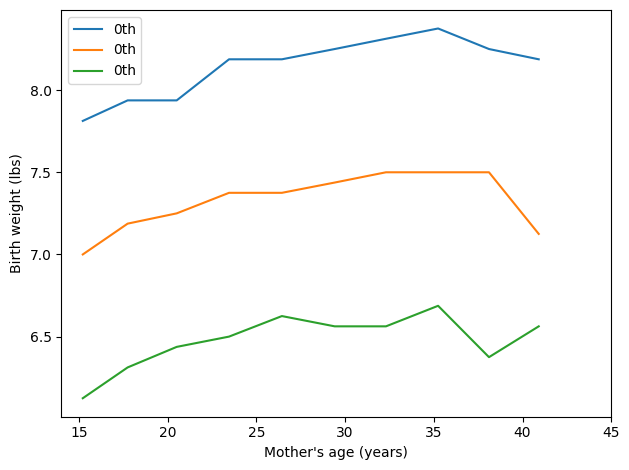

<IPython.core.display.Javascript object>

In [32]:
# Solution


def binned_percentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)
    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [Cdf.from_seq(group.totalwgt_lb) for i, group in groups][1:-1]

    for percent in [0.75, 0.50, 0.25]:
        weights = [cdf.inverse(percent) for cdf in cdfs]
        label = "%dth" % percent
        plt.plot(ages, weights, label=label)

    decorate(
        xlabel="Mother's age (years)",
        ylabel="Birth weight (lbs)",
        xlim=[14, 45],
        legend=True,
    )


binned_percentiles(live)

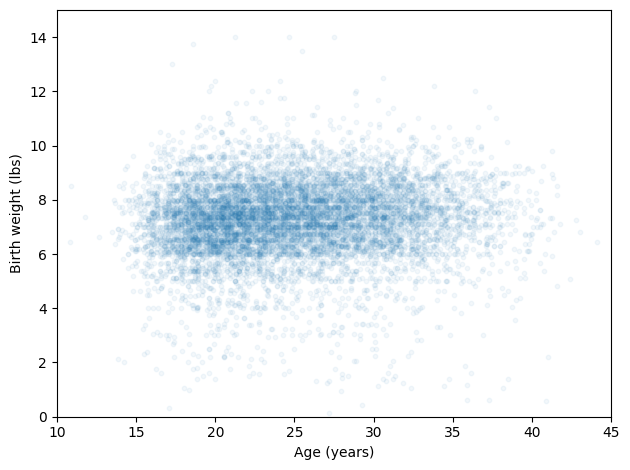

<IPython.core.display.Javascript object>

In [33]:
# Solution

plt.scatter(ages, weights, alpha=0.05, s=10)
decorate(
    xlabel="Age (years)",
    ylabel="Birth weight (lbs)",
    xlim=[10, 45],
    ylim=[0, 15],
)